In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1

#### Problem 1a) 

In [2]:
X_list =  [] 
Y_list = []
for i in np.arange(100000):
    X = random.choice([-1,0,1])
    Y = random.choice([-1,0,1])
    if X ==0:
        Y = random.choice([-1,1])
    if Y==0:
        X = random.choice([-1,1])
    X_list.append(X)
    Y_list.append(Y)
X_list = np.array(X_list)
Y_list = np.array(Y_list)

In [50]:
X_list = np.array([-1,0,1,-1,1,-1,0,1])
Y_list = np.array([1,1,1,0,0,-1,-1,-1])

In [51]:
mean(X_list*Y_list)

0.0

In [54]:
mean(Y_list)

0.0

(-1.5, 1.5)

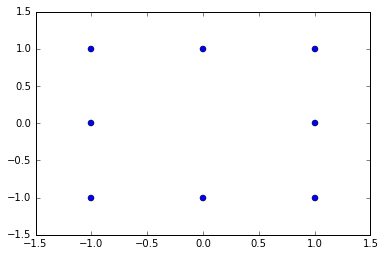

In [55]:
plt.plot(X_list,Y_list,'o')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

# Problem 2 

$$N(x) = \frac{1}{\sqrt{2\pi}\sqrt{|\Sigma|}} exp \Bigg(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\Bigg)$$

In [2]:
def compute_gaussian(x,y,cov,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(cov)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

In [3]:
from scipy.interpolate import griddata
def plot_countour(x,y,z,xmin=-5,xmax = 5,ymin=-5,ymax = 5, title=""):#,ymin=-5, ymax=5):
    xi = np.linspace(-10,10, 100)
    yi = np.linspace(-10,10, 100)
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = np.linspace(0.2,1,11)
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.jet, levels=levels)
    plt.colorbar()  
    plt.title(title,fontsize = 14)
    plt.xlabel("x",fontsize = 14)
    plt.ylabel("y",fontsize = 14)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

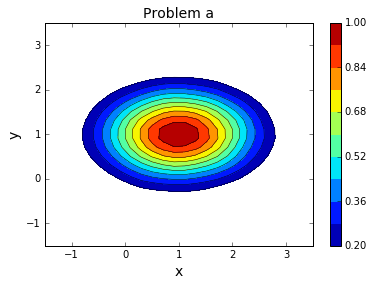

In [4]:
N=1000
cov = np.matrix([[2,0],[0,1]])
mu = np.array([1,1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-1.5,3.5,-1.5,3.5,title="Problem a")

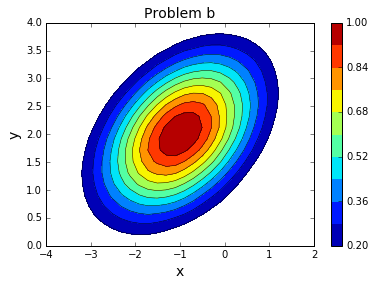

In [5]:
N=1000
cov = np.matrix([[3,1],[1,2]])
mu = np.array([-1,2])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-4,2,0,4,title="Problem b")

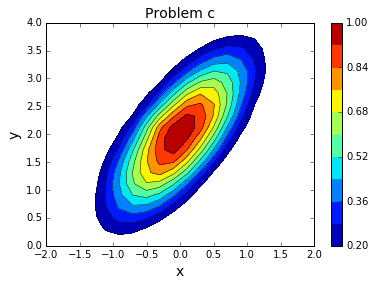

In [6]:
N=1000
cov = np.matrix([[1,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem c")

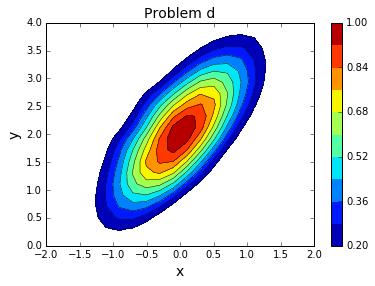

In [7]:
N=1000
cov = np.matrix([[1,1],[1,2]])
cov2 = np.matrix([[3,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem d")

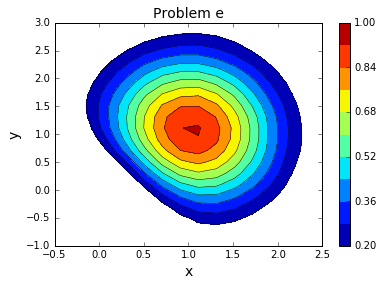

In [8]:
N=1000
cov = np.matrix([[1,0],[0,2]])
cov2 = np.matrix([[2,1],[1,2]])
mu1 = np.array([1,1])
mu2 = np.array([-1,-1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-0.5,2.5,-1,3,title="Problem e")

# Problem 3

#### Problem 3a ) 

In [162]:
N = 100
X1 = []
X2 = []
mu1 = 3
sig1 = sqrt(9)
mu2 = 4
sig2 = sqrt(4)
for i in np.arange(N):
    X1.append(random.normal(mu1,sig1))
for i in np.arange(N):
    X2.append(random.normal(mu2,sig2))   
X1 = np.array(X1)
X2 = 0.5*np.array(X1) +np.array(X2)

In [163]:
mu1_sample = mean(X1)
mu2_sample = mean(X2)
print "Problem 3a: The mean of the sample X1 = ",mu1_sample
print "The mean of the sample X2 = ",mu2_sample

Problem 3a: The mean of the sample X1 =  3.36522846137
The mean of the sample X2 =  6.14753175154


In [164]:
#Mean vector 
mu = np.array([mu1_sample,mu2_sample])
# print mu

#### Problem 3b)

$$\Sigma = \left [ E[(X_1 - \mu_1)(X_1 - \mu_1)]  E[(X_1 - \mu_1)(X_2 - \mu_2)]  \\
\quad E[(X_2 - \mu_2)(X_1 - \mu_1)]  E[(X_2 - \mu_2)(X_2 - \mu_2)\right] $$

In [165]:
# print "Covariance matrix ="
# covmat = np.matrix([[mean((X1-mu1)*(X1-mu1)),mean((X1-mu1)*(X2-mu2))],[mean((X2-mu2)*(X1-mu1)),mean((X2-mu2)*(X2-mu2))]])
# print covmat

In [166]:
covmat = np.cov([X1,X2])
print covmat

[[ 9.00219168  5.00787467]
 [ 5.00787467  6.43578732]]


#### Problem 3c) 

In [167]:
numpy.linalg.eig(covmat)

(array([ 12.88865259,   2.5493264 ]), array([[ 0.79000562, -0.6130996 ],
        [ 0.6130996 ,  0.79000562]]))

In [168]:
eigenvalue =  numpy.linalg.eig(covmat)[0]
eigenvector =  numpy.linalg.eig(covmat)[1]

In [169]:
print "Eigenvalue: " , eigenvalue
print "Eigenvector: " , eigenvector[0] ,"and" , eigenvector[1]

Eigenvalue:  [ 12.88865259   2.5493264 ]
Eigenvector:  [ 0.79000562 -0.6130996 ] and [ 0.6130996   0.79000562]


#### Problem 3d) 

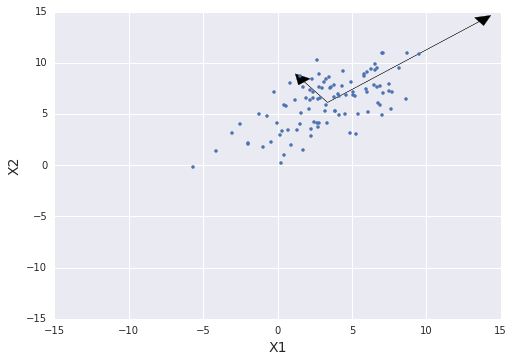

In [170]:
import seaborn 
fig, ax = plt.subplots()
plt.plot(X1,X2,'.')
plt.xlim(-15,15)
plt.ylim(-15,15) 
dr =  eigenvalue[1] * np.array(eigenvector[0])
dr2 =  eigenvalue[0] * np.array(eigenvector[1])
ax.arrow(mu1_sample, mu2_sample, dr[1], dr[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
ax.arrow(mu1_sample, mu2_sample, dr2[1], dr2[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
plt.xlabel("X1",fontsize=14)
plt.ylabel("X2",fontsize=14)

#### Problem 3 e) 

(-15, 15)

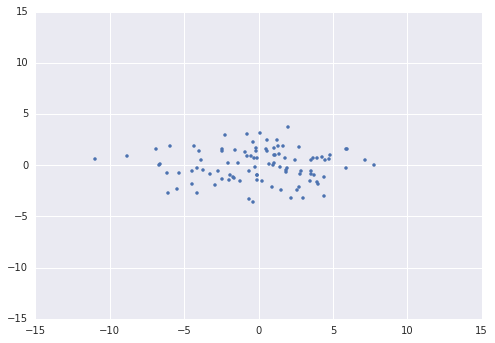

In [171]:
newX12 = np.dot(eigenvector.T,(X1-mu[0], X2-mu[1]))
plt.plot(newX12[0,:],newX12[1,:],'.')
plt.xlim(-15,15)
plt.ylim(-15,15)

#### Q4.d. The question should state "To maximize f(x)", not "To maximize the probability of f(x)". The function f(x) is already a probability distribution, so maximizing it is maximizing a probability. 


# Problem 5

Please hold out 10,000 points from the training set for validation. Rather than training on 60,000 points at the max, train on 50,000. Report error rates on the 10,000 point training set, similar to HW1. 

#### Problem 5 a) , c) 

In [17]:
import scipy.io
from sklearn import svm
from sklearn import metrics
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit_dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit_dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
#Flatten the image into 784 pixel long vector 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

#get a list of 10100 unique random numbers for indexing 
N=50000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)


In [18]:
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices

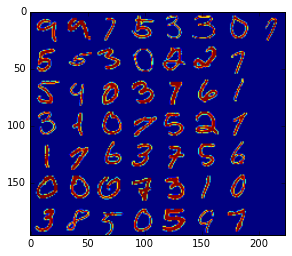

In [19]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,N))[:,:,:50]))

Normalizing the image by dividing by L2 norm: 
$$    L2  = \sqrt{\sum |x_k|^2}$$

In [167]:
# sqrt(sum(img**2))
# np.linalg.norm(train_subset,axis=1)

In [172]:
train_subset_normalized = []
for i in np.arange(N):
    img = train_subset[i,:]
    L2 =sqrt(sum(img**2))
    train_subset_normalized.append(img/L2)
train_subset_normalized = np.array(train_subset_normalized)

In [173]:
len(np.where(train_subset_normalized>1)[0])

5517837

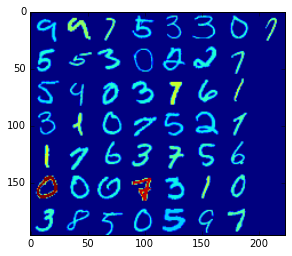

In [174]:
plt.imshow(montage_images(train_subset_normalized.T.reshape((28,28,N))[:,:,:50]))

Using MLE, we find that the best fit parameters for Gaussian pdf is $\hat{\mu} =$ sample mean and $\hat{\sigma}^2 =$ sample variance. 

For each digit class, we select the images that are labelled for that class then we compute the covariance 

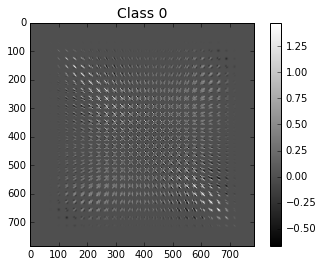

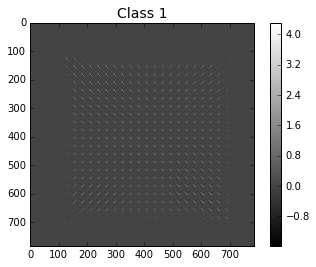

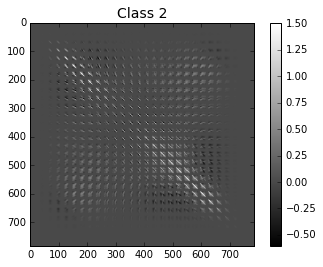

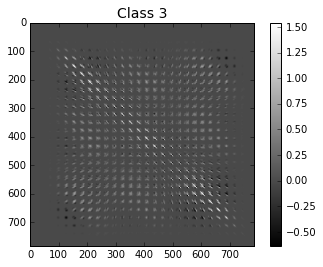

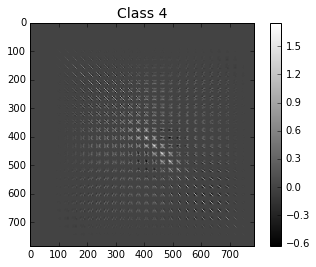

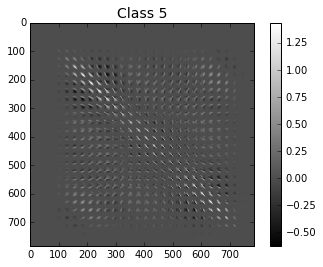

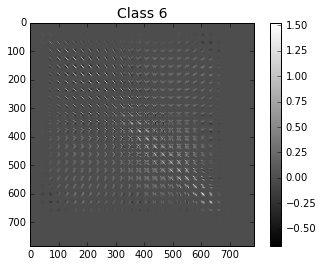

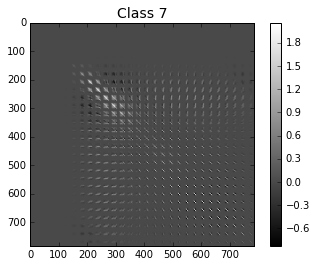

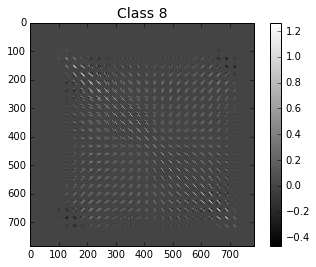

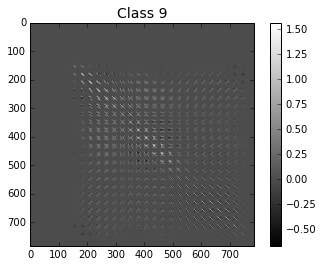

In [175]:
if DEBUG: shape(np.sum(train_subset_normalized[idx],axis=0))
covmat_list = []
mvec_list = []
for i in np.arange(10):
    plt.figure()
#     print "For digit class ", i ," : "
    idx  = np.where(labels_subset==i)[0]
    dat = train_subset_normalized[idx].T
    mvec = np.array(np.sum(train_subset_normalized[idx],axis=0)/shape(dat)[1])
#     print mvec
    covmat = np.cov(dat)
    plt.imshow(covmat,cmap = cm.gray)
    plt.title("Class {}".format(i),fontsize=14)
    plt.colorbar()
    covmat_list.append(covmat)
    mvec_list.append(mvec)
covmat_list=np.array(covmat_list)
mvec_list = np.array(mvec_list)

The covariance matrix is a 784x784 matrix as 784 is the number of features.
The elements along the diagonal are the $E[X_n,X_n]$ elements, these are simply the variance of the feature. (e.g. $E[X_8,X_8]$ at pixel 35 on every image, what is the variance that this is a digit 8) The nondiagonal elements are the ones that the covariance, what is the variance that even though this is a feature digit 4 but looks like feature digit 8. This makes sense if we examine the matrix of Class 7, since our image is flatterned as a long vector and we start writing from left-to-right, top-to-bottom. We find that  for seven we have low variance to start off with because people may start of writing their 7s very differently but most of them end with a straight line so they are quite simmilar.

#### Problem 5b) 

Estimating prior for QDA :
$$ \hat{\pi_c} = \frac{n_c}{\sum_D n_D}$$

From the labels we know the number of digits that is classified as a certain class

In [176]:
prior_list = []
for c in np.arange(10):
    denom = len(labels_subset)
    n_c  = len(np.where(labels_subset==c)[0])
    prior = n_c / float(denom)
    prior_list.append(prior)
    print "Prior for Class ", c,":",prior
prior_list = np.array(prior_list)

Prior for Class  0 : 0.09862
Prior for Class  1 : 0.11266
Prior for Class  2 : 0.09986
Prior for Class  3 : 0.10132
Prior for Class  4 : 0.0975
Prior for Class  5 : 0.08986
Prior for Class  6 : 0.0992
Prior for Class  7 : 0.10406
Prior for Class  8 : 0.09726
Prior for Class  9 : 0.09966


These probabilities make sense because they are close to 1/10 (assuming equal occurence), but they are sampled randomly (not uniformly) in the MNIST dataset so it is something around that value

In [177]:
1/10.

0.1

Check that the probability adds up to 1 

In [178]:
sum(prior_list)==1.0

True

####Q5.d. Please hold out 10,000 points from the training set for validation. Rather than training on 60,000 points at the max, train on 50,000. Report error rates on the 10,000 point training set, similar to HW1. 

####Q5.f. "Can you tie this in with what you proved in part 4.d", not "Can you tie this in with what you proved in part 6.f". 

Choose class C that maximizes the linear discriminant function : 
    $$f_c(x) = \mu_c^T \Sigma^{-1} x - \frac{1}{2}\mu_c^T \Sigma^{-1}\mu_c+ln\pi_c$$

#### Problem 5d) i) 

Since we are assuming that the covariance is the same, this is a linear discriminant analysis problem

We compute the f(x) for each digit class and then this gives us the probability for each class, the largest number means that the datapoint x is most likely to be in this class. So this gives us our classification. 
                $$argmax[f_c(x)] $$

In [179]:
avrg_covmat = np.sum(covmat_list,axis=0)/10.
avrg_pmat = np.linalg.inv(avrg_covmat + np.identity(784)*0.001)#Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)

In [180]:
c = 0
def compute_fc(c,x):
    mu_c = mvec_list[c]
    return np.dot(np.dot(mu_c.T,avrg_pmat),x) - 0.5*np.dot(np.dot(mu_c.T,avrg_pmat),mu_c)+np.log(prior_list[c])

In [224]:
shape(train_subset_normalized)

(50000, 784)

In [227]:
trainset_size = [5,100]#,200]#,500,1000,2000,5000,10000,30000,50000]
err_list = []
for N in trainset_size:
    y_pred= []
    avrg_covmat = np.sum(covmat_list,axis=0)/10.
    pmat = np.linalg.inv(avrg_covmat+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
    for i in np.arange(100):
        #Examining the ith image dataset
        x = train_subset_normalized[i]
        #Looping through each class
        f_list = []
        for c in np.arange(10):
            f_list.append(compute_fc(c,x))
        y_pred.append(np.argmax(f_list)) 
    err_list.append(benchmark(np.array(y_pred),labels_subset[:100])[0])

In [228]:
print err_list

[0.19, 0.19]


For the c-th digit class: 

In [148]:
c = 0
mu_c = mvec_list[c]
pmat = np.linalg.inv(covmat_list[c]+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
x = train_subset[i]
f_i  = np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])

8


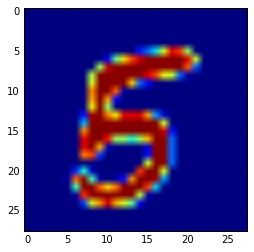

In [100]:
#Examining the ith image dataset
i = 1
x = train_subset[i]
#Looping through each class
f_list = []
for c in np.arange(10):
    mu_c = mvec_list[c]
    pmat = np.linalg.inv(covmat_list[c]+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
    f_i  = np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])
    f_list.append(f_i)
print np.argmax(f_list)
plt.imshow(train_subset[i].reshape(28,28))

8


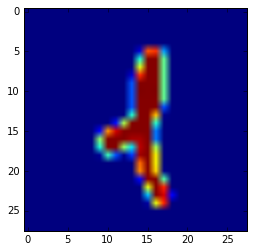

In [101]:
#Examining the ith image dataset
i = 10 
x = train_subset[i]
#Looping through each class
f_list = []
for c in np.arange(10):
    mu_c = mvec_list[c]
    pmat = np.linalg.inv(covmat_list[c]+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
    f_i  = np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])
    f_list.append(f_i)
print np.argmax(f_list)
plt.imshow(train_subset[i].reshape(28,28))

9


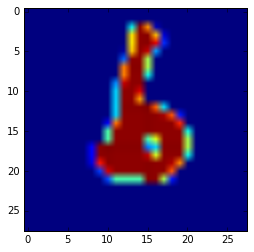

In [103]:
#Examining the ith image dataset
i = 100
x = train_subset[i]
#Looping through each class
f_list = []
for c in np.arange(10):
    mu_c = mvec_list[c]
    pmat = np.linalg.inv(covmat_list[c]+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
    f_i  = np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])
    f_list.append(f_i)
print np.argmax(f_list)
plt.imshow(train_subset[i].reshape(28,28))

In [104]:
y_pred= []
for i in np.arange(100):
    #Examining the ith image dataset
    i = 1
    x = train_subset[i]
    #Looping through each class
    f_list = []
    for c in np.arange(10):
        mu_c = mvec_list[c]
        pmat = np.linalg.inv(covmat_list[c]+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
        f_i  = np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])
        f_list.append(f_i)
    y_pred.append(np.argmax(f_list)) 
#     plt.imshow(train_subset[i].reshape(28,28))

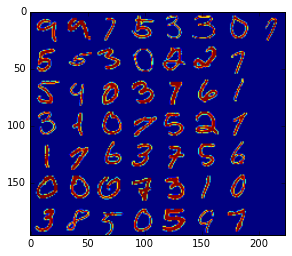

In [109]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,N))[:,:,:50]))

# Problem 6

In [198]:
housing_data_test = scipy.io.loadmat("data/housing_dataset/housing_data.mat")
Xtrain= housing_data_test['Xtrain']
Xvalidate= housing_data_test['Xvalidate']
Ytrain= housing_data_test['Ytrain']
Yvalidate= housing_data_test['Yvalidate']

#### Question 6.1 ) 

Using Maximum log likelihood estimation, we get the least square fit function  that we want to minimize over: 

$$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2$$

where a1...aM is the parameter, in our case of the linear fit it will simply be parameters a,b from the model $y=ax+b$
and $x_i$ is the datapoints and $y_i$ is the training data points

But since our housing data has 8 dimensions, we want to generalize this into 8+1 dimensions (+1 because of the constant term ($i$) ), so our linear model should instead look like: 
$$y = ax_{1i}+bx_{2i}+cx_{3i}+dx_{4i}+ex_{5i}+fx_{6i}+gx_{7i}+hx_{8i}+i = \mathbf{w^T} \mathbf{x}$$

where $x = [x_1...x_8]$ and $\mathbf{w} = [a,...,h,i]$

Minimizing sum of squares residual : 
    $$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2 = (\mathbf{Y}-\mathbf{Xw})^T (\mathbf{Y}-\mathbf{Xw}) $$

Linear regression has the closed form solution that we obtained in HW 1 : 


$$\mathbf{w}=(\mathbf{X^T \Lambda X})^{-1}(\mathbf{X^T\Lambda Y} ) =(\mathbf{X^T X})^{-1}(\mathbf{X^T Y} )$$

since we are not assigning weights to these linear regression (i.e. all variables weighted equally), the $\mathbf{\Lambda}$  is just the identity matrix. 

In [220]:
x = Xtrain
#adding bias term 
x =np.insert(x,8,np.ones(shape(x)[0]),axis=1)
y = np.ndarray.astype(Ytrain[:,0],dtype=float)
n = shape(x)[0]
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
y_pred = np.dot(x,w.T)

#### Question 6.2) 

Range of predicted values

In [158]:
print max(y_pred)
print min(y_pred)

707901.770571
-653471.850389


Range of actual values

In [159]:
print max(y)
print min(y)

500001.0
14999.0


In [218]:
residual  =sum((y-y_pred)**2)
print "Residual sum of squares: " , residual

Residual sum of squares:  9.39511852879e+13


#### Question 6.3) 

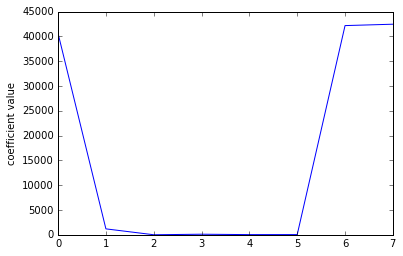

In [211]:
plt.plot(abs(w)[:-1])
plt.ylabel("coefficient value")

This tells us that the median house values depend heavily on index 0, 6, and 7, which corresponds to median income, latitude, longitude, which intuitively makes sense. 

#### Question 6.4) 

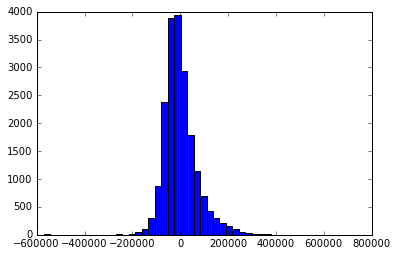

In [216]:
histo =  plt.hist(y-y_pred,50)

This is a Gaussian centered around 0, which tells us that most of the data in our training example is located close to zero. There isn't a lot of outliers in the training data

In [ ]:
histo =  plt.hist(y,50)

##References: 
- "Pylab_examples Example Code: Arrow_demo.py." Pylab_examples Example Code: Arrow_demo.py — Matplotlib 1.5.1 Documentation. N.p., n.d. Web. 21 Feb. 2016.
- "Matplotlib: Making 2D Gaussian Contours with Transparent Outermost Layer." _Python_. N.p., n.d. Web. 21 Feb. 2016.
- "Covariance Matrix." _Wikipedia_. Wikimedia Foundation, n.d. Web. 21 Feb. 2016.
- Raschka, Sebastian. "Linear Discriminant Analysis Bit by Bit." _Linear Discriminant Analysis Bit by Bit_. N.p., n.d. Web. 22 Feb. 2016.